<a href="https://colab.research.google.com/github/Itsmrk/Bahria-Uni/blob/master/03.Regression__Problem_%26_Cost_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cost Function**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [30]:
import io
from google.colab import files 
uploaded = files.upload()

Saving weight-height.csv to weight-height (1).csv


In [31]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
x = df[['Height']].values
y_true = df[['Weight']].values

In [0]:
def line(x, w=0, b =0):
  return w*x+b  

def mean_squared_error(y_true, y_pred):
  s = (y_true - y_pred) ** 2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

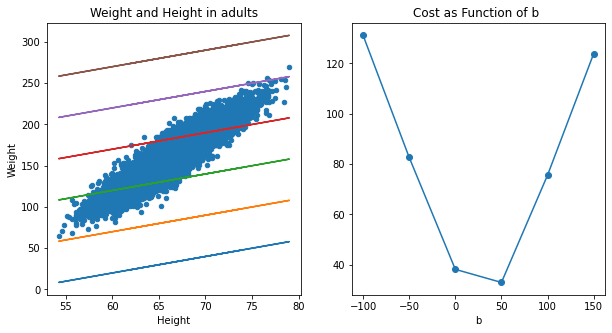

In [34]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
df.plot(kind = 'scatter',
       x = 'Height',
       y = 'Weight',
       title = 'Weight and Height in adults', ax = ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred = line(x,w=2, b=b)
  mse = mean_squared_error(y_true , y_pred)
  mses.append(mse)
  plt.plot(x,y_pred) 

ax2 = plt.subplot(122)
plt.plot(bs , mses , 'o-')
plt.title("Cost as Function of b ")
plt.xlabel('b')

**Linear Regression With Keras**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam , SGD

In [0]:
x = df[['Height']].values
y_true = df[['Weight']].values

In [37]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [38]:
x.shape

(10000, 1)

In [0]:
model = Sequential()
model.add(Dense(1,input_shape =(1,)))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8), mean_squared_error)

In [42]:
model.fit(x,y_true, epochs=40)

Epoch 1/40


AttributeError: ignored